# Polígono de vias - Protótipo

Esse notebook contem um prototipo para gerar polígonos para as vias de São Paulo.
Utilizamos o distrito de Pinheiros para a prova de conceito.

A metodologia utilizada consiste em gerar o "negativo" dos lotes, que resulta em um polígono único.

Para cortar este polígono, utilizamos a intersecção entre ele e os polígonos gerados a partir de um buffer de 1 metro sobre os segmentos de reta que representam as vias de São Paulo.

Assim, conseguimos obter polígonos para cada via, devidamente identificada com os dados da base de logradouros, como provado nas plotagens ao final do Notebook.



In [ ]:
import geopandas as gp

In [5]:
lotes = gp.read_file('SIRGAS_SHP_LOTES_62_PINHEIROS/SIRGAS_SHP_LOTES_62_PINHEIROS.shp')

In [6]:
distr = gp.read_file('SIRGAS_SHP_distrito/SIRGAS_SHP_distrito_polygon.shp')

In [11]:
pinheiros = distr[distr['ds_nome']=='PINHEIROS'].reset_index(drop = True)

In [12]:
pinheiros

,ds_codigo,ds_nome,geometry
0,62,PINHEIROS,"POLYGON ((326414.8676519466 7392091.011973876,..."


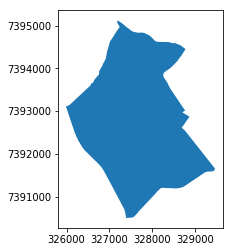

In [97]:
pinheiros.plot()

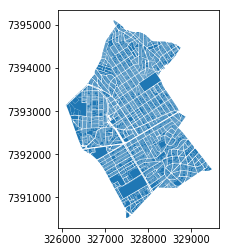

In [99]:
lotes.plot()

In [16]:
diff = gp.overlay(pinheiros, lotes, how = 'difference')

In [17]:
import pickle

with open('diff_vias.pi', 'wb') as f:
    pickle.dump(diff, f)

In [18]:
%matplotlib inline

In [39]:
diff.head()

,ds_codigo,ds_nome,geometry
0,62,PINHEIROS,(POLYGON ((326414.8676519466 7392091.011973876...


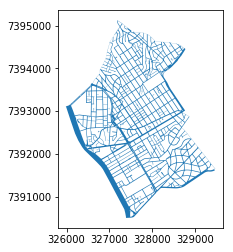

In [19]:
diff.plot()

In [21]:
linhas_vias = gp.read_file('SIRGAS_SHP_logradouronbl/SIRGAS_SHP_logradouronbl.shp')

In [29]:
set(linhas_vias.geom_type)

{'LineString'}

In [34]:
linhas_pinheiros = gp.sjoin(linhas_vias, pinheiros, op = 'intersects')

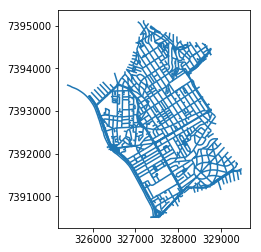

In [35]:
linhas_pinheiros.plot()

In [59]:
linhas_pinheiros.drop(columns = ['index_right'], inplace = True)

In [65]:
linhas_pinheiros['largura_base'] = linhas_pinheiros['geometry'].buffer(1)

In [68]:
linhas_pinheiros.set_geometry('largura_base', inplace = True)

In [100]:
largura_pinheiros = gp.overlay(diff, linhas_pinheiros, how = 'union')

In [101]:
largura_pinheiros.head().geometry.area

0     34.797515
1    141.701363
2     18.439257
3     90.707702
4    322.704364
dtype: float64

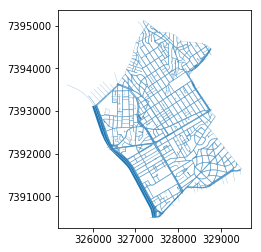

In [128]:
largura_pinheiros.plot()

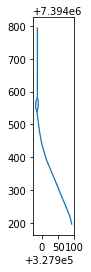

In [116]:
largura_pinheiros[largura_pinheiros['lg_nome']=='ABEGOARIA'].plot()

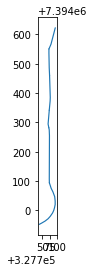

In [117]:
largura_pinheiros[largura_pinheiros['lg_nome']=='MADALENA'].plot()

In [118]:
largura_pinheiros[largura_pinheiros['lg_nome']=='MADALENA'].area

849    684.550238
861    764.583057
877    253.412451
885    484.863730
894    375.277303
903    313.893931
dtype: float64

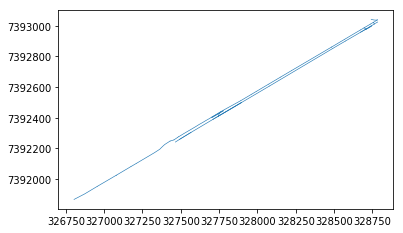

In [119]:
largura_pinheiros[largura_pinheiros['lg_nome']=='REBOUCAS'].plot()

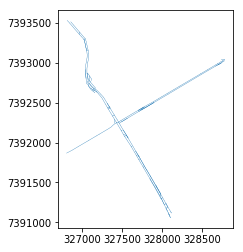

In [120]:
largura_pinheiros[(largura_pinheiros['lg_nome']=='REBOUCAS')|(largura_pinheiros['lg_nome']=='FARIA LIMA')].plot()

In [133]:
[nome for nome in largura_pinheiros['lg_nome'].unique() if 'MARGINAL' in str(nome)]

['MARGINAL PINHEIROS INTCB']

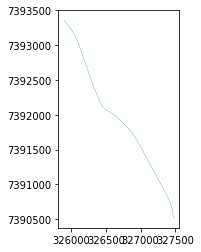

In [134]:
largura_pinheiros[largura_pinheiros['lg_nome']=='MARGINAL PINHEIROS INTCB'].plot()